In [1]:


from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
#from ConsIndShockModel import IndShockConsumerType
import time
from copy import copy, deepcopy
import numpy as np
import matplotlib.pyplot as plt
import time




# The Reshuffling method for Monte Carlo simulations

In [2]:


Dict = {
    
    # Parameters shared with the perfect foresight model
    "Rfree": 1.04**.25,                   # Interest factor on assets
    "LivPrb" : [.99375],                     # Survival probability
    "PermGroFac" :[1.00],                 # Permanent income growth factor

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" :  [.06],                 # Standard deviation of log permanent shocks to income
    "TranShkStd" : [.2],                   # Standard deviation of log transitory shocks to income
    "UnempPrb" : 0.1,                     # Probability of unemployment while working

    # Parameters only used in simulation
    "T_sim" : 500,                       # Number of periods to simulate
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 1.0,  # Standard deviation of log initial assets
    
     }



In [3]:
# Generate Baseline Agent
Agent = IndShockConsumerType(**Dict, verbose = False)
Agent.cycles = 0
Agent.solve()

# Generate Agent with Reshuffling method activated
Dict_w_reshuffle = deepcopy(Dict)
Dict_w_reshuffle['reshuffle'] = True # allow reshuffling for Monte Carlo Simulations

Agent_w_Reshuffling = IndShockConsumerType(**Dict_w_reshuffle, verbose = False)
Agent_w_Reshuffling.cycles = 0
Agent_w_Reshuffling.solve()




In [4]:
# least common multiple for number of agents needed to allow reshuffling method to work
lcm = (Agent_w_Reshuffling.PermShkCount * Agent_w_Reshuffling.TranShkCount) * 10 # number of permanent shocks x number of transitory shocks x 1/UnempPrb

lcm = int(lcm) 
AgentCount = lcm 
print(AgentCount)



490


## Simulate time series for aggregate savings and aggregate consumption

In [5]:
Agent.AgentCount = AgentCount
Agent.track_vars = ['aLvl', 'pLvl', 'cNrm'] # Track level of assets
Agent.initialize_sim()
Agent.simulate() #Simulate with Monte Carlo

# compute time series of aggregate consumption and aggregate assets
Agg_A_no_reshuffle = []
Agg_C_no_reshuffle = []

for t in range(Agent.T_sim):
    A_no_reshuffle = np.mean(Agent.history['aLvl'][t])
    C_no_reshuffle = np.mean(Agent.history['cNrm'][t]*Agent.history['pLvl'][t])

    Agg_A_no_reshuffle.append(A_no_reshuffle)
    Agg_C_no_reshuffle.append(C_no_reshuffle)


In [6]:

#Simulate agent with reshuffling activated
Agent_w_Reshuffling.AgentCount = AgentCount 
Agent_w_Reshuffling.track_vars = ['aLvl','cNrm' , 'pLvl'] # Track level of assets, permanent income, and normalized consumption
Agent_w_Reshuffling.initialize_sim()
Agent_w_Reshuffling.simulate() #Simulate with Monte Carlo

# compute time series of aggregate consumption and aggregate assets
Agg_A = []
Agg_C = []
for t in range(Agent_w_Reshuffling.T_sim):
    A = np.mean(Agent_w_Reshuffling.history['aLvl'][t])
    C = np.mean(Agent_w_Reshuffling.history['cNrm'][t]*Agent_w_Reshuffling.history['pLvl'][t])

    Agg_A.append(A)
    Agg_C.append(C)


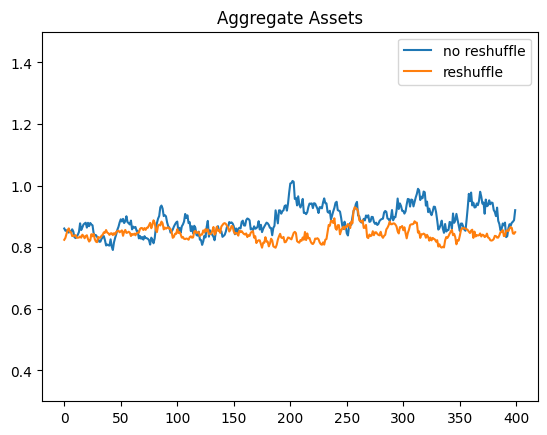

In [7]:
plt.plot(Agg_A_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_A[100:], label = 'reshuffle')
plt.ylim(0.3,1.5)
plt.title('Aggregate Assets')
plt.legend()

In [8]:
print('variance no reshuffle', np.var(Agg_A_no_reshuffle[100:]))
print('variance with reshuffle' , np.var(Agg_A[100:]))

print('ratio of no reshuffle to reshuffle', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A[100:]) )


variance no reshuffle 0.0017933131401455986
variance with reshuffle 0.00043926585028530613
ratio of no reshuffle to reshuffle 4.082523462683998


(0.8, 1.5)

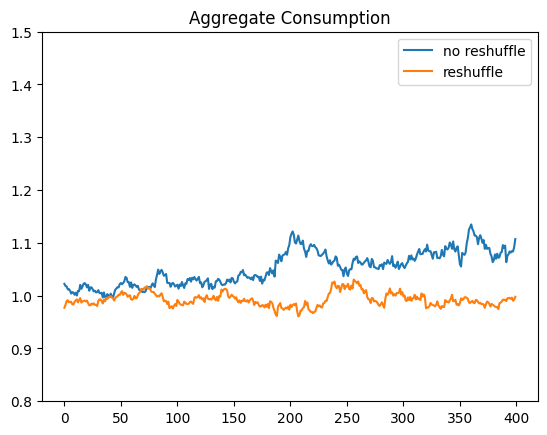

In [9]:
plt.plot(Agg_C_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_C[100:], label = 'reshuffle')
plt.legend()
plt.title('Aggregate Consumption')
plt.ylim(.8,1.5)


In [10]:
print('variance no reshuffle', np.var(Agg_C_no_reshuffle[100:]))
print('variance with reshuffle' , np.var(Agg_C[100:]))
print('ratio of no reshuffle to reshuffle', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C[100:]) )


variance no reshuffle 0.0010157191656484672
variance with reshuffle 0.000154210138968546
ratio of no reshuffle to reshuffle 6.586591338560701


# Reshuffling and Harmenberg

In [11]:
# Create agent with Harmenberg method activated for simulations
Agent_w_Harmenberg = IndShockConsumerType(**Dict, verbose = False)
Agent_w_Harmenberg.cycles = 0
Agent_w_Harmenberg.solve()



In [12]:
Agent_w_Harmenberg.neutral_measure = True
Agent_w_Harmenberg.AgentCount = AgentCount
Agent_w_Harmenberg.track_vars = ['aNrm','cNrm'] # Track level of assets
Agent_w_Harmenberg.initialize_sim()
Agent_w_Harmenberg.simulate() #Simulate with Monte Carlo

# Compute aggregate consumption and aggregate savings
# note for harmenberg, we aggregate over normalized values 
Agg_A_Harmenberg = []
Agg_C_Harmenberg = []

for t in range(Agent.T_sim):
    A_Harm = np.mean(Agent_w_Harmenberg.history['aNrm'][t])
    C_Harm = np.mean(Agent_w_Harmenberg.history['cNrm'][t])

    Agg_A_Harmenberg.append(A_Harm)
    Agg_C_Harmenberg.append(C_Harm)


In [13]:

# Create agent with both harmenberg and reshuffling activated for Monte Carlo simulations
Agent_w_Harmenberg_reshuffle = IndShockConsumerType(**Dict_w_reshuffle, verbose = False)
Agent_w_Harmenberg_reshuffle.cycles = 0
Agent_w_Harmenberg_reshuffle.solve()

In [14]:
Agent_w_Harmenberg_reshuffle.neutral_measure = True # allow the use of neutral measure (allow for Harmenberg Method when simulating)
Agent_w_Harmenberg_reshuffle.AgentCount = AgentCount
Agent_w_Harmenberg_reshuffle.track_vars = ['aNrm','cNrm'] # Track level of assets
Agent_w_Harmenberg_reshuffle.initialize_sim()
Agent_w_Harmenberg_reshuffle.simulate() #Simulate with Monte Carlo

# Compute Aggregates
Agg_A_Harmenberg_reshuffle = []
Agg_C_Harmenberg_reshuffle = []

for t in range(Agent.T_sim):
    A_Harm_reshuffle = np.mean(Agent_w_Harmenberg_reshuffle.history['aNrm'][t])
    C_Harm_reshuffle = np.mean(Agent_w_Harmenberg_reshuffle.history['cNrm'][t])

    Agg_A_Harmenberg_reshuffle.append(A_Harm_reshuffle)
    Agg_C_Harmenberg_reshuffle.append(C_Harm_reshuffle)

# Comparing reshuffling, harmenberg, and standard Monte Carlo Simulations

## Aggregate Savings

(0.5, 1.3)

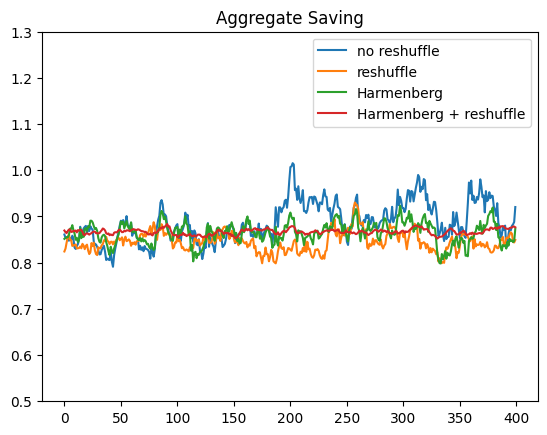

In [15]:
plt.plot(Agg_A_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_A[100:], label = 'reshuffle')
plt.plot(Agg_A_Harmenberg[100:], label = 'Harmenberg')
plt.plot(Agg_A_Harmenberg_reshuffle[100:], label = 'Harmenberg + reshuffle' )
plt.legend()
plt.title('Aggregate Saving')
plt.ylim(.5,1.3)

In [16]:

print('ratio of no reshuffle to reshuffle', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A[100:]) )
print('ratio of no reshuffle to Harmenberg', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A_Harmenberg[100:]) )
print('ratio of no reshuffle to Harmenberg + reshuffle', np.var(Agg_A_no_reshuffle[100:]) /np.var(Agg_A_Harmenberg_reshuffle[100:]) )


ratio of no reshuffle to reshuffle 4.082523462683998
ratio of no reshuffle to Harmenberg 3.366920192737571
ratio of no reshuffle to Harmenberg + reshuffle 52.49980623927158


## Aggregate Consumption

(0.8, 1.3)

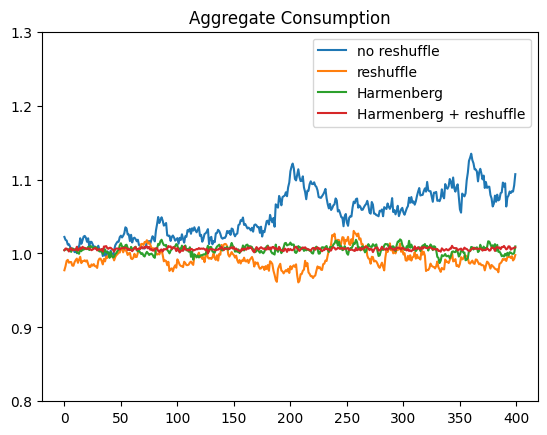

In [19]:
plt.plot(Agg_C_no_reshuffle[100:], label = 'no reshuffle')
plt.plot(Agg_C[100:], label = 'reshuffle')
plt.plot(Agg_C_Harmenberg[100:], label = 'Harmenberg')
plt.plot(Agg_C_Harmenberg_reshuffle[100:], label = 'Harmenberg + reshuffle')
plt.legend()
plt.title('Aggregate Consumption')
plt.ylim(.8,1.3)

In [18]:

print('ratio of no reshuffle to reshuffle', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C[100:]) )
print('ratio of no reshuffle to Harmenberg', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C_Harmenberg[100:]) )
print('ratio of no reshuffle to Harmenberg + reshuffle', np.var(Agg_C_no_reshuffle[100:]) /np.var(Agg_C_Harmenberg_reshuffle[100:]) )


ratio of no reshuffle to reshuffle 6.586591338560701
ratio of no reshuffle to Harmenberg 34.59977718880339
ratio of no reshuffle to Harmenberg + reshuffle 342.8666899720768
